In [1]:
import pandas as pd
import numpy as np

import nltk

In [2]:
import pickle
with open('C:/Users/a.kraev/Enter_NLP/Lesson_1/preprocessed_tweets.pkl', 'rb') as f:
    combine_df = pickle.load(f)

combine_df.head()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunct, selfish, drag, kid, dysfunc..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thank, lyft, credit, use, caus, offer, wheelc..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesti]"
3,4,0.0,#model i love u take with u all the time in ...,model love yoyou take with yoyou all the time ...,"[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]"
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguid, societi, motiv]"


# Задание 1.
Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [3]:
df_X_train = combine_df.iloc[0:31962, [6, 7]]
df_X_test = combine_df.iloc[31962:, [6, 7]]
df_y_train = combine_df.iloc[0:31962, [1]]             

In [4]:
df_X_train.info()
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_stemmed     31962 non-null  object
 1   tweet_lemmatized  31962 non-null  object
dtypes: object(2)
memory usage: 499.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   31962 non-null  float64
dtypes: float64(1)
memory usage: 249.8 KB


In [5]:
df_y_train.loc[:, 'label'] = df_y_train.loc[:, 'label'].astype(int)
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   31962 non-null  int32
dtypes: int32(1)
memory usage: 125.0 KB


In [6]:
df_X_train['tweet_stemmed_text'] = df_X_train['tweet_stemmed'].apply(lambda x: ' '.join(x))
df_X_train['tweet_lemmatized_text'] = df_X_train['tweet_lemmatized'].apply(lambda x: ' '.join(x))

df_X_train.head()

,tweet_stemmed,tweet_lemmatized,tweet_stemmed_text,tweet_lemmatized_text
0,"[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunct, selfish, drag, kid, dysfunc...",father dysfunct selfish drag kid dysfunct run,father dysfunct selfish drag kid dysfunct run
1,"[thank, lyft, credit, use, caus, offer, wheelc...","[thank, lyft, credit, use, caus, offer, wheelc...",thank lyft credit use caus offer wheelchair va...,thank lyft credit use caus offer wheelchair va...
2,"[bihday, majesti]","[bihday, majesti]",bihday majesti,bihday majesti
3,"[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]",model love yoyou take yoyou time yoyour,model love yoyou take yoyou time yoyour
4,"[factsguid, societi, motiv]","[factsguid, societi, motiv]",factsguid societi motiv,factsguid societi motiv


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_X_train['tweet_stemmed_text'].tolist(),
                                                      df_y_train['label'].tolist(), 
                                                      test_size=0.33, 
                                                      random_state=42)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_df=0.9, stop_words='english', max_features=1000, lowercase=False)

count_vectorizer.fit(combine_df['tweet_stemmed'].apply(lambda x: ' '.join(x)).tolist())
count_vec_train = count_vectorizer.transform(X_train)
count_vec_valid = count_vectorizer.transform(X_valid)

pd.DataFrame(count_vec_train.toarray(), columns = count_vectorizer.get_feature_names())

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(count_vec_train, y_train)
pred = model.predict_proba(count_vec_valid)
f1_score_stemmed_BoW = f1_score(y_valid, pred[:,1]>0.3)
f1_score_stemmed_BoW

0.5491990846681923

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(df_X_train['tweet_lemmatized_text'].tolist(),
                                                      df_y_train['label'].tolist(), 
                                                      test_size=0.33, 
                                                      random_state=42)

count_vectorizer = CountVectorizer(max_df=0.9, stop_words='english', max_features=1000, lowercase=False)

count_vectorizer.fit(combine_df['tweet_lemmatized'].apply(lambda x: ' '.join(x)).tolist())
count_vec_train = count_vectorizer.transform(X_train)
count_vec_valid = count_vectorizer.transform(X_valid)

pd.DataFrame(count_vec_train.toarray(), columns = count_vectorizer.get_feature_names())

model = LogisticRegression()
model.fit(count_vec_train, y_train)
pred = model.predict_proba(count_vec_valid)
f1_score_lemmatized_BoW = f1_score(y_valid, pred[:,1]>0.3)
f1_score_lemmatized_BoW

0.5513016845329249

# Задание 2.
Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_valid, y_train, y_valid = train_test_split(df_X_train['tweet_lemmatized_text'].tolist(),
                                                      df_y_train['label'].tolist(), 
                                                      test_size=0.33, 
                                                      random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, stop_words='english', max_features=1000, lowercase=False)

tfidf_vectorizer.fit(combine_df['tweet_lemmatized'].apply(lambda x: ' '.join(x)).tolist())
tfidf_vec_train = tfidf_vectorizer.transform(X_train)
tfidf_vec_valid = tfidf_vectorizer.transform(X_valid)

pd.DataFrame(count_vec_train.toarray(), columns = count_vectorizer.get_feature_names())

model = LogisticRegression()
model.fit(tfidf_vec_train, y_train)
pred = model.predict_proba(tfidf_vec_valid)
f1_score_lemmatized_tfidf = f1_score(y_valid, pred[:,1]>0.3)
f1_score_lemmatized_tfidf

0.5425101214574899

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(df_X_train['tweet_stemmed_text'].tolist(),
                                                      df_y_train['label'].tolist(), 
                                                      test_size=0.33, 
                                                      random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, stop_words='english', max_features=1000, lowercase=False)

tfidf_vectorizer.fit(combine_df['tweet_stemmed'].apply(lambda x: ' '.join(x)).tolist())
tfidf_vec_train = tfidf_vectorizer.transform(X_train)
tfidf_vec_valid = tfidf_vectorizer.transform(X_valid)

pd.DataFrame(count_vec_train.toarray(), columns = count_vectorizer.get_feature_names())

model = LogisticRegression()
model.fit(tfidf_vec_train, y_train)
pred = model.predict_proba(tfidf_vec_valid)
f1_score_stemmed_tfidf = f1_score(y_valid, pred[:,1]>0.3)
f1_score_stemmed_tfidf

0.5385239253852392

# Задание 3.
Выведите результаты f1-score всех моделей, сделайте вывод.

In [13]:
f1_score_stemmed_BoW

0.5491990846681923

In [14]:
f1_score_lemmatized_BoW

0.5513016845329249

In [15]:
f1_score_stemmed_tfidf

0.5385239253852392

In [16]:
f1_score_lemmatized_tfidf

0.5425101214574899

Bag-of-Words более выгоден,чем TF-IDF. Леммантизация отрабатывает лучше стемминга во всех случаях.


# Задание 4.
Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

In [17]:
!pip install wordcloud

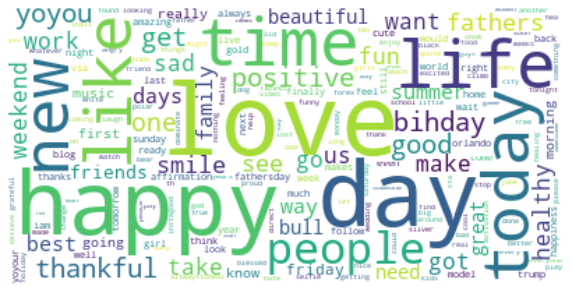

In [18]:
import collections
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

words = []
    
for line in combine_df['tweet_token_filtered']: 
    words.extend(line)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Задание 5.
Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0). 

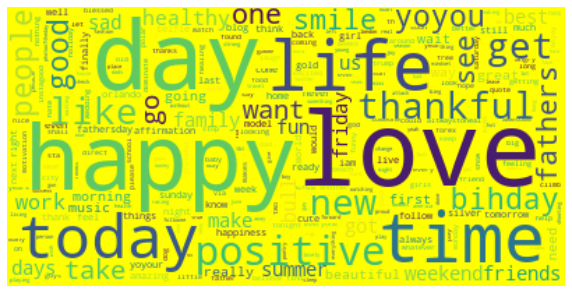

In [19]:
words = []
    
for line in combine_df.loc[combine_df['label'] == 0, 'tweet_token_filtered']:
    words.extend(line)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='yellow',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Задание 6.
Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 


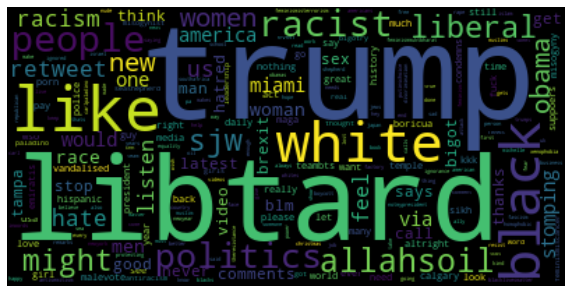

In [20]:
words = []
    
for line in combine_df.loc[combine_df['label'] == 1, 'tweet_token_filtered']:
    words.extend(line)

wordfreq = collections.Counter(words)

wordcloud = WordCloud(
 background_color='black',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)

plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()